# import libraries

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# documention of Data

### documention of each column in the data from the csv file:

1- Name: The title of the movie.

2- Rating: The movie's rating (e.g., G, PG, R) indicating the age-appropriateness of the content.

3- Genre: The category or type of the movie (e.g., Drama, Adventure, Action, Comedy).

4- Year: The year the movie was released.

5- Released: The specific release date of the movie in a formatted way (month day, year) and the country where it was released.

6- Score: The average viewer score or rating given to the movie.

7- Votes: The number of votes or ratings submitted by viewers.

8- Director: The director of the movie.

9- Writer: The writer or writers of the movie.

10- Star: One of the main actors or actresses who appear in the movie.

11- Country: The country of origin of the movie.

12- Budget: The budget spent on producing the movie.

13- Gross: The total gross earnings or revenue generated by the movie.

14- Company: The production company responsible for the movie.

15- Runtime: The duration of the movie in minutes.

### The set has:

Numerical columns: Year, Budget, Gross, Runtime, Score and  Votes

Categorical columns: Company, Country, Director, Genre, Name, Rating, Star and Writer.

Date columns: Released .

# Read the Data and Know some Info

In [2]:
df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# know the summary information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [4]:
# see the describtion of the Numeric columns in the datafeame

print("Summary Of The Dataset with Numeric columns :")
df.describe()

Summary Of The Dataset with Numeric columns :


,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [5]:
# see the describtion of the catergorical columns in the datafeame

print("Summary Of The Dataset with catergorical columns: ")
df.describe(include='object')

Summary Of The Dataset with catergorical columns: 


,name,rating,genre,released,director,writer,star,country,company
count,7668,7591,7668,7666,7668,7665,7667,7665,7651
unique,7512,12,19,3414,2949,4535,2814,59,2385
top,Nobody's Fool,R,Comedy,"February 14, 1986 (United States)",Woody Allen,Woody Allen,Nicolas Cage,United States,Universal Pictures
freq,3,3697,2245,9,38,37,43,5475,377


In [6]:
# Know the Existing Columns
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [7]:
# check for shape of the data
df.shape

(7668, 15)

In [8]:
# Data Types for our columns
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [9]:
# We need to see if we have any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    miss = '{} - {}%'.format(col, pct_missing)
    print(miss)

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [10]:
# checking for missing Data
print('\n we can see that the data have missing data lets fix it')

df.isnull().sum()


 we can see that the data have missing data lets fix it


name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

# Cleaning the Data

In [11]:
# fill the empty cells in the (votes, budget, gross, rating) columns
x = df["votes"].mean()
w = df["gross"].mean()
f = df["runtime"].mean()
z = np.random.choice(["R", "PG", "NC-17", "PG-13", "Not Rated"])

df["votes"].fillna(x, inplace = True)
df["gross"].fillna(w, inplace = True)
df["rating"].fillna(z, inplace = True)
df["runtime"].fillna(f, inplace = True)

In [12]:
# Fill empty cells in "Budget" with random data from existing values
existing_budgets = df.dropna(subset=["budget"])["budget"]
df["budget"] = df["budget"].apply(lambda x: np.random.choice(existing_budgets) if pd.isnull(x) else x)

In [13]:
# delete the cells that can't be filled
df = df.dropna()

In [14]:
#checking dunplicate rows
df.duplicated().sum()

0

In [15]:
# delete the duplicated data in the dataframe
df = df.drop_duplicates()

In [16]:
# checking for missing Data
print('\n we can see that the data was missing is fixed')

df.isnull().sum()


 we can see that the data was missing is fixed


name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [17]:
# change the datatype for the (votes, budget, gross, rating) columns
df["votes"] = df["votes"].astype('int64')
df["budget"] = df["budget"].astype('int64')
df["gross"] = df["gross"].astype('int64')
df["runtime"] = df["runtime"].astype('int64')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7645 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7645 non-null   object 
 1   rating    7645 non-null   object 
 2   genre     7645 non-null   object 
 3   year      7645 non-null   int64  
 4   released  7645 non-null   object 
 5   score     7645 non-null   float64
 6   votes     7645 non-null   int64  
 7   director  7645 non-null   object 
 8   writer    7645 non-null   object 
 9   star      7645 non-null   object 
 10  country   7645 non-null   object 
 11  budget    7645 non-null   int64  
 12  gross     7645 non-null   int64  
 13  company   7645 non-null   object 
 14  runtime   7645 non-null   int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 955.6+ KB


In [19]:
# Order our Data a little bit to organize it

df = df.sort_values('gross', ascending = False)
df = df.reset_index(drop=True)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
1,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
2,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
3,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
4,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


# correlations

In [20]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson',numeric_only = True)

TypeError: corr() got an unexpected keyword argument 'numeric_only'

In [ ]:
df.corr(method ='kendall',numeric_only = True)

In [ ]:
# scatter plot budget Vs gross using matplotlib

plt.scatter(x= df['budget'], y= df['gross'])

plt.title("Budget VS Gross Earnings")
plt.xlabel("Budget For Film")
plt.ylabel("Gross Earnings")

plt.figure(figsize=(10, 8))  
plt.show()

In [ ]:
# scatter plot budget Vs gross using seaborn

sns.regplot(x="budget", y="gross", data=df)

plt.title("Budget VS Gross Earnings")
plt.xlabel("Budget For Film")
plt.ylabel("Gross Earnings")

plt.figure(figsize=(10, 8))  
plt.show()

In [ ]:
# plot budget Vs score using seaborn to check if budget affect the score of the movie

sns.regplot(x="budget", y="score", data=df)

plt.title("Budget VS score Earnings")
plt.xlabel("Budget For Film")
plt.ylabel("score for film")

plt.figure(figsize=(10, 8))  
plt.show()

In [ ]:
# correlations between ('gross','budget','score') columns
import warnings

new_df = pd.DataFrame(df, columns=['gross', 'budget', 'score'])
warnings.filterwarnings("ignore")

g = sns.pairplot(new_df, diag_kind="kde")

g.map_upper(sns.scatterplot, color='coral')
g.map_lower(sns.kdeplot, levels=4, color=".2")
g.map_diag(plt.hist, color="lime")

plt.figure(figsize=(10, 8))
plt.show()
warnings.filterwarnings("default")

In [ ]:
# a heatmap for the correlations for the numeric columns
correlation_matrix = df.corr(method ='pearson',numeric_only = True)

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")

plt.figure(figsize=(10, 8))  
plt.show()

In [ ]:
ax = sns.clustermap(
    df.corr(numeric_only = True), 
    method='complete', 
    cmap='coolwarm', 
    annot=True, 
    annot_kws={'size': 10}
)

plt.setp(ax.ax_heatmap.get_xticklabels(), rotation=60)
plt.show()  # Display the plot

# Answear Queastions About the Data

In [ ]:
# 1. How many movies are in the DataFrame?

print('How many movies are in the DataFrame? \n')
num_movies = df['name'].nunique()
print("Number of movies:", num_movies)

In [ ]:
# 2. What is the average score of the movies?

print('What is the average score of the movies? \n')
average_score = df["score"].mean()
print("Average score:", round(average_score, 3))

In [ ]:
# 3. What is the highest grossing movie?

print('What is the highest grossing movie? \n')

# highest_grossing_movie = df.sort_values(by = 'gross', ascending = False)['name'].iloc[0]
# print("Highest grossing movie:", highest_grossing_movie)

# OR 

highest_grossing_movie = df[df["gross"] == df["gross"].max()]["name"].iloc[0]
print("Highest grossing movie:", highest_grossing_movie)

In [ ]:
# 4. How many movies were released in the United States?

print('How many movies were released in the United States? \n')
us_released_movies = df[df["country"] == "United States"]
num_us_released_movies = us_released_movies['name'].nunique()
print("Number of movies released in the United States:", num_us_released_movies)

In [ ]:
# 5. What is the total budget for all the movies?

print('What is the total budget for all the movies? \n')
total_budget = df["budget"].sum()
print("Total budget:", round(total_budget/1000000000, 4), 'Billion Dollar')

In [ ]:
# 6. What is the most common genre among the movies?

print('What is the most common genre among the movies? \n ')
most_common_genre = df["genre"].value_counts().idxmax()
print("Most common genre:", most_common_genre)

In [ ]:
# 7. Who directed the movie with the longest runtime?

print('Who directed the movie with the longest runtime? \n')
longest_runtime_movie = df[df["runtime"] == df["runtime"].max()]["name"].iloc[0]
longest_runtime = df[df["runtime"] == df["runtime"].max()]["runtime"].iloc[0]
longest_runtime_director = df[df["runtime"] == df["runtime"].max()]["director"].iloc[0]
print("Movie with the longest runtime:", longest_runtime_movie)
print("Movie runtime:", longest_runtime, 'minutes')
print("Director of the longest runtime movie:", longest_runtime_director)

In [ ]:
# 8. What is the average budget of movies released in the United States?

print('What is the average budget of movies released in the United States? \n')
average_us_budget = us_released_movies["budget"].mean()
print("Average budget of movies released in the United States:", round(average_us_budget/1000000, 3), "Million Dollar")

In [ ]:
# 9. What are the names of movies with a score above 8.0 and a runtime below 120 minutes?

print('What are the names of movies with a score above 8.0 and a runtime below 120 minutes? \n')
high_score_short_runtime_movies = df[(df["score"] > 8.0) & (df["runtime"] < 120)]["name"].tolist()
print("Movies with score above 8.0 and runtime below 120 minutes:" )
for idx, movie in enumerate(high_score_short_runtime_movies, start=1):
    print(f"{idx}- {movie}")

In [ ]:
# 10. Which writer contributed to the most movies in the dataset?

print('Which writer contributed to the most movies in the dataset? \n')
most_prolific_writer = df["writer"].value_counts().idxmax()
num_movies_by_most_prolific_writer = df["writer"].value_counts().max()
print("Most prolific writer:", most_prolific_writer)
print("Number of movies by the most prolific writer:", num_movies_by_most_prolific_writer)

# Visualisations for the Data

In [ ]:
# Set up the style for Seaborn
sns.set(style="whitegrid")

# Distribution of Ratings
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")

# Adding annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

In [ ]:
# Average Score by Genre with Annotations

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="genre", y="score")
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Average Score")
plt.title("Average Score by Genre")

# Adding annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [ ]:
# Scatter Plot of Score and Gross Earnings

print('we can see that there is Positive relationship between score and gross earnings')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="score", y="gross", color='r')
plt.xlabel("Score")
plt.ylabel("Gross Earnings")
plt.title("Scatter Plot of Score and Gross Earnings")
plt.show()

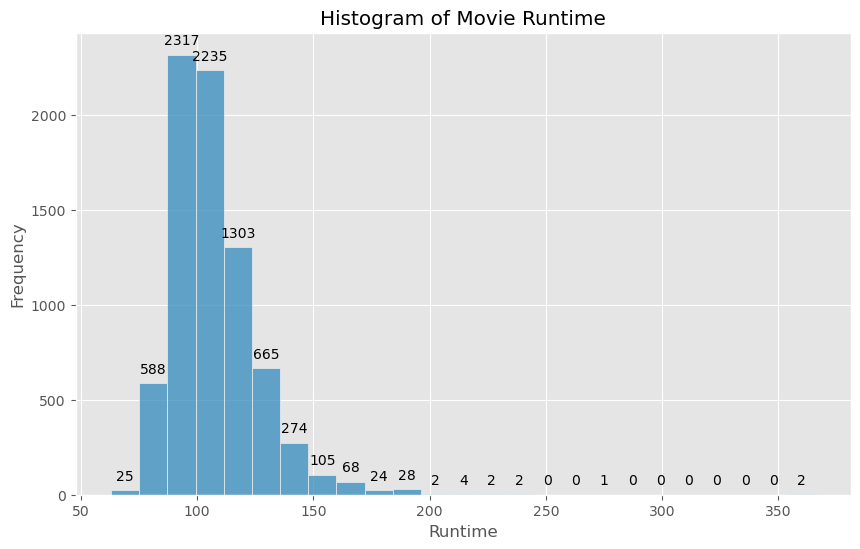

In [21]:
# Histogram of Movie Runtime with Annotations

plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x="runtime", bins=25)
plt.xlabel("Runtime")
plt.ylabel("Frequency")
plt.title("Histogram of Movie Runtime")

# Adding annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


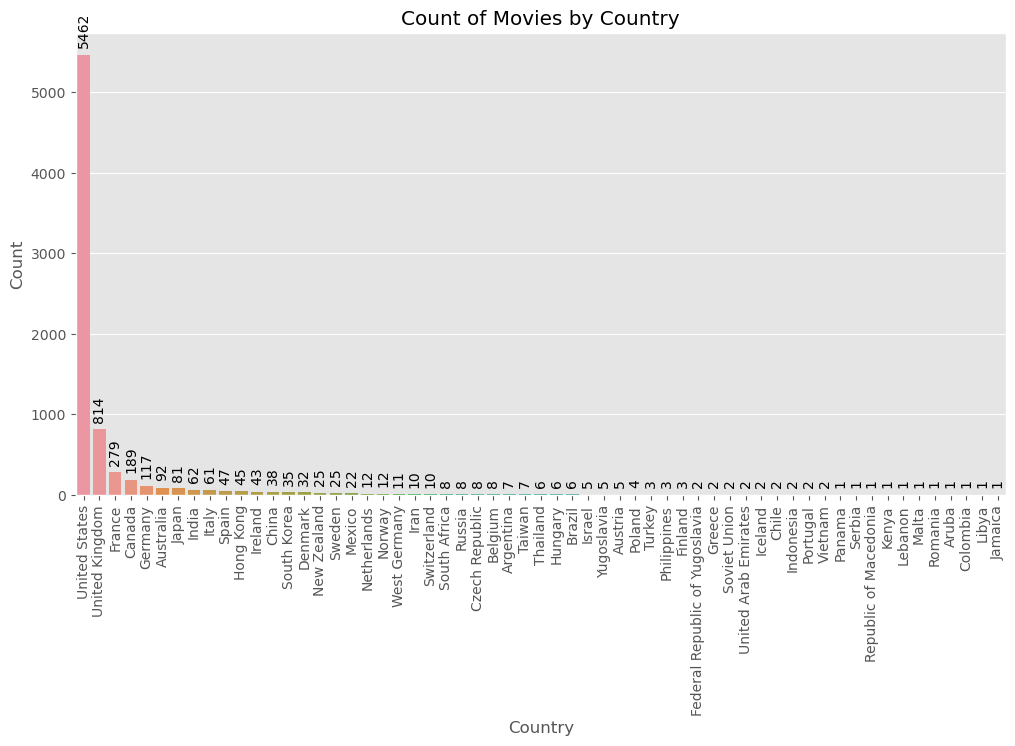

In [22]:
# Count of Movies by Country with Annotations

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x="country", order=df["country"].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Count of Movies by Country")

# Adding vertical annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points', rotation='vertical')
    

plt.show()

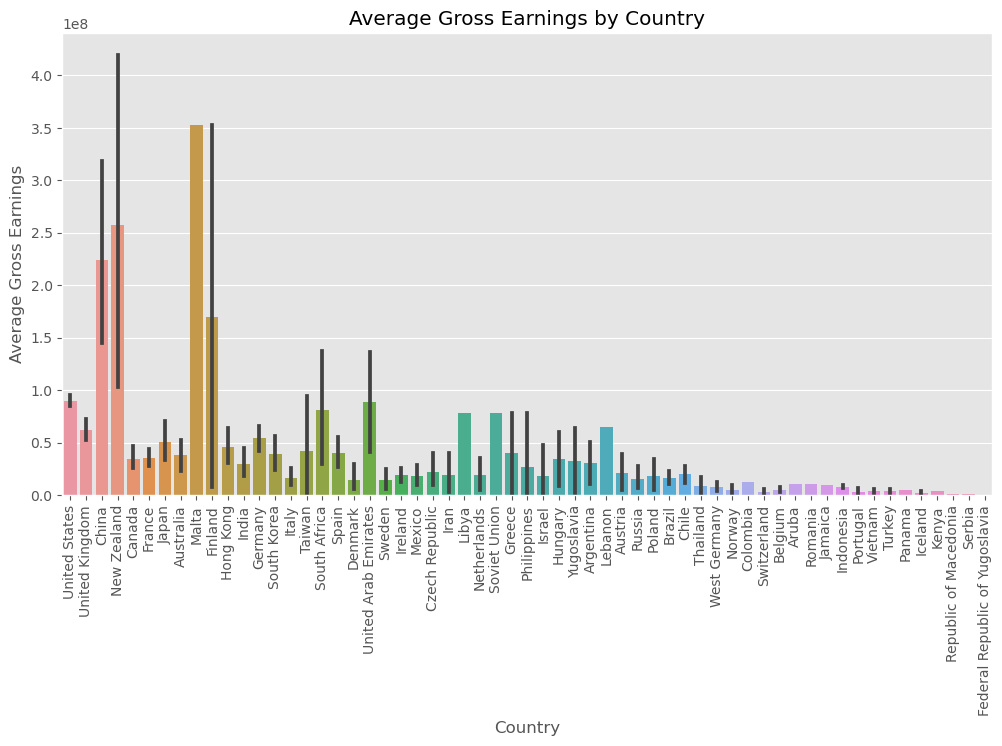

In [24]:
# Barplot of Average Gross Earnings by Country

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="country", y="gross", estimator=np.mean)
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Average Gross Earnings")
plt.title("Average Gross Earnings by Country")
plt.show()

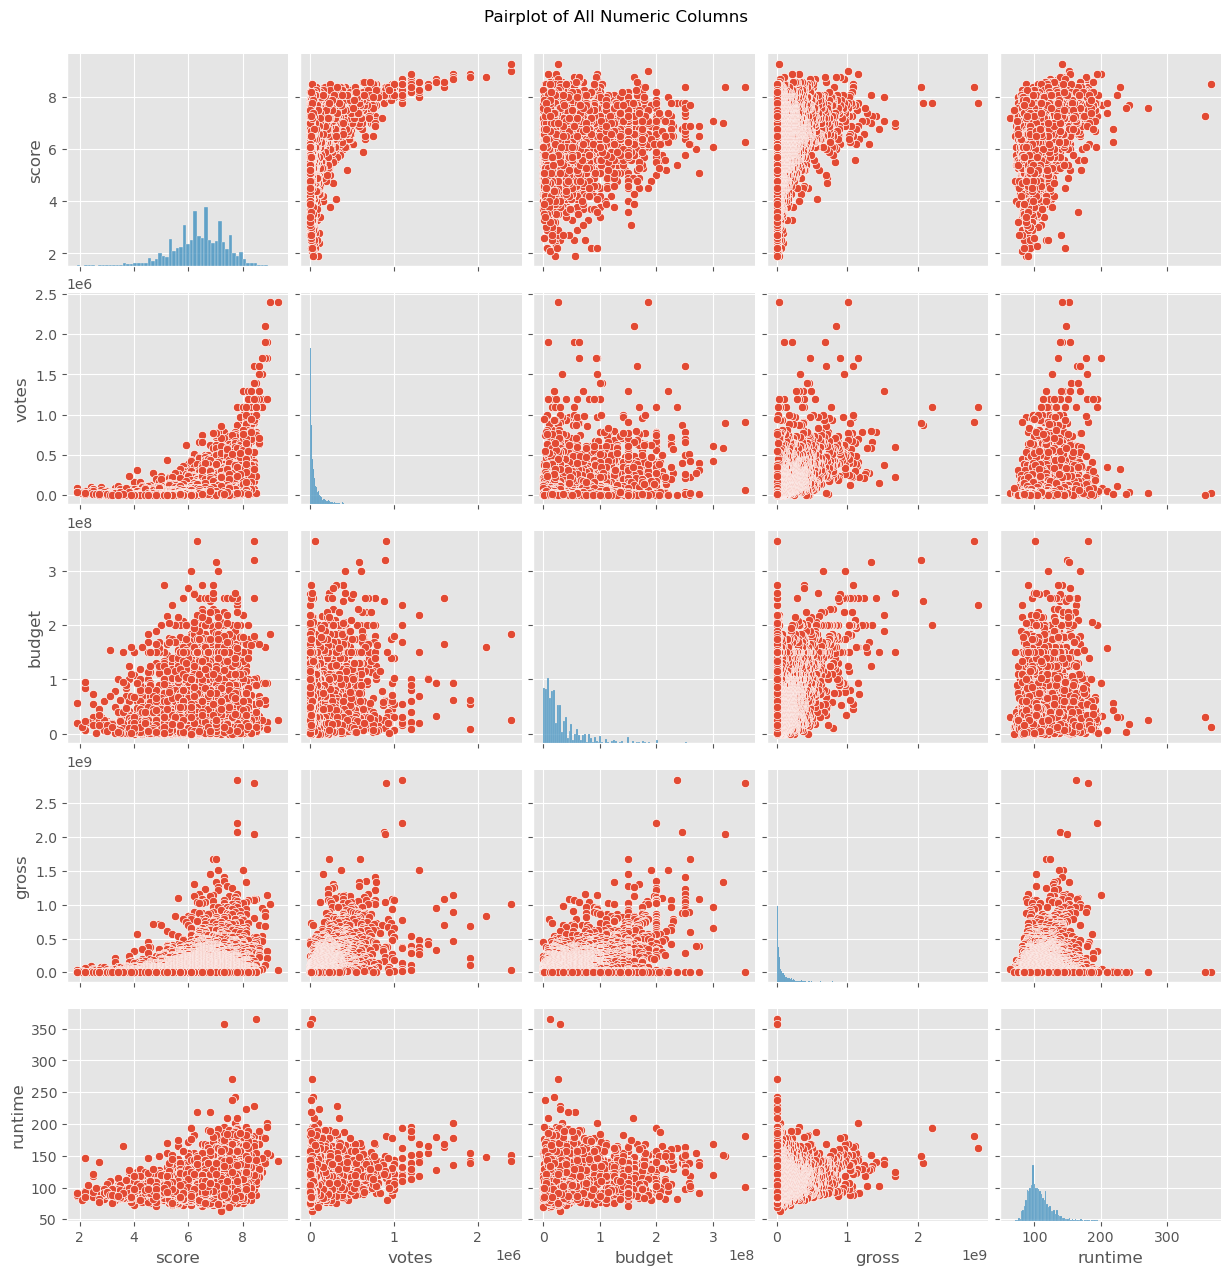

In [29]:
# Pairplot of All Numeric Columns Features

sns.pairplot(data=df, vars=["score", "votes", "budget", "gross", "runtime"])

plt.suptitle("Pairplot of All Numeric Columns", y=1.02)
plt.show()

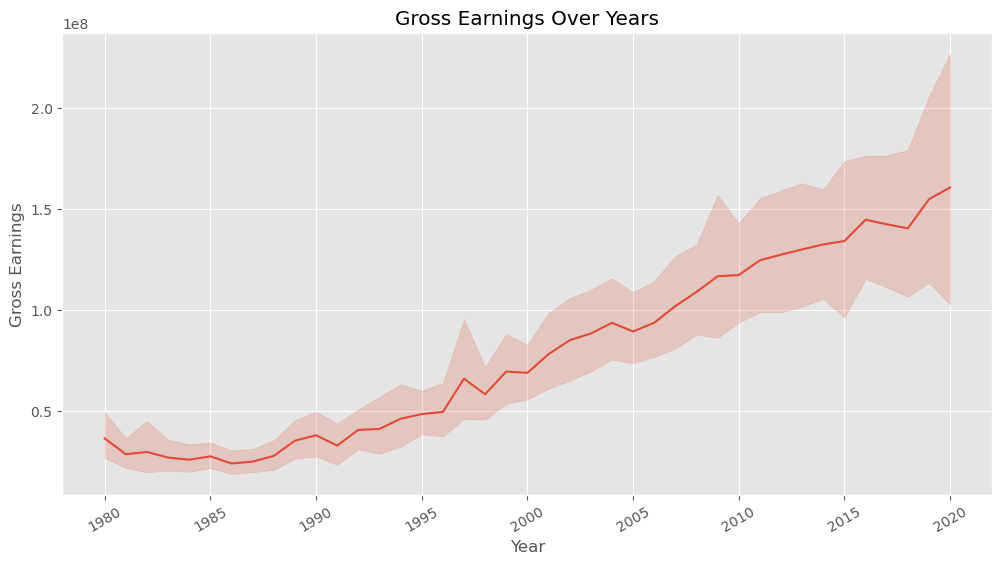

In [30]:
# Line Plot of Gross Earnings Over Years

plt.figure(figsize=(12, 6))
df["year"] = df["year"].astype(int)
sns.lineplot(data=df, x="year", y="gross")
plt.xlabel("Year")
plt.ylabel("Gross Earnings")
plt.title("Gross Earnings Over Years")
plt.xticks(rotation=30)
plt.show()

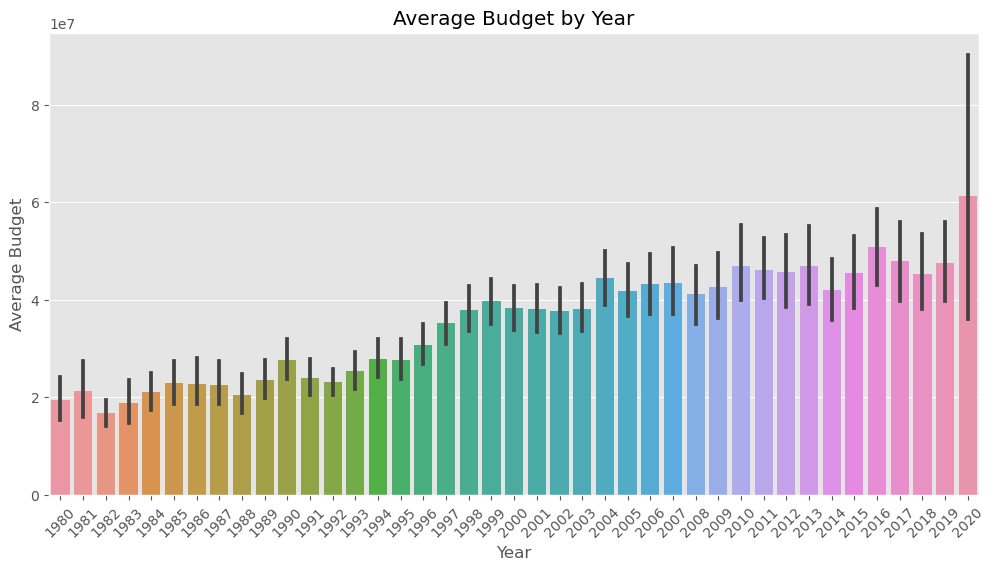

In [32]:
# Barplot of Budget by Year

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="year", y="budget", estimator=np.mean)
plt.xlabel("Year")
plt.ylabel("Average Budget")
plt.title("Average Budget by Year")
plt.xticks(rotation=45)
plt.show()

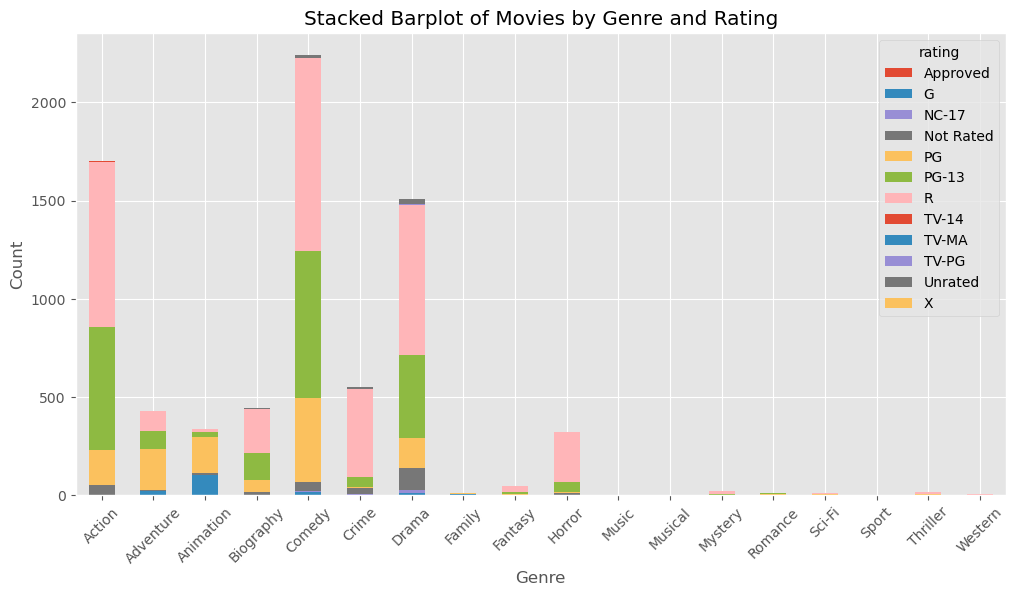

In [33]:
# Stacked Barplot of Movies by Genre and Rating

genre_rating_counts = df.groupby(["genre", "rating"]).size().unstack()
genre_rating_counts.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Stacked Barplot of Movies by Genre and Rating")
plt.xticks(rotation=45)
plt.show()

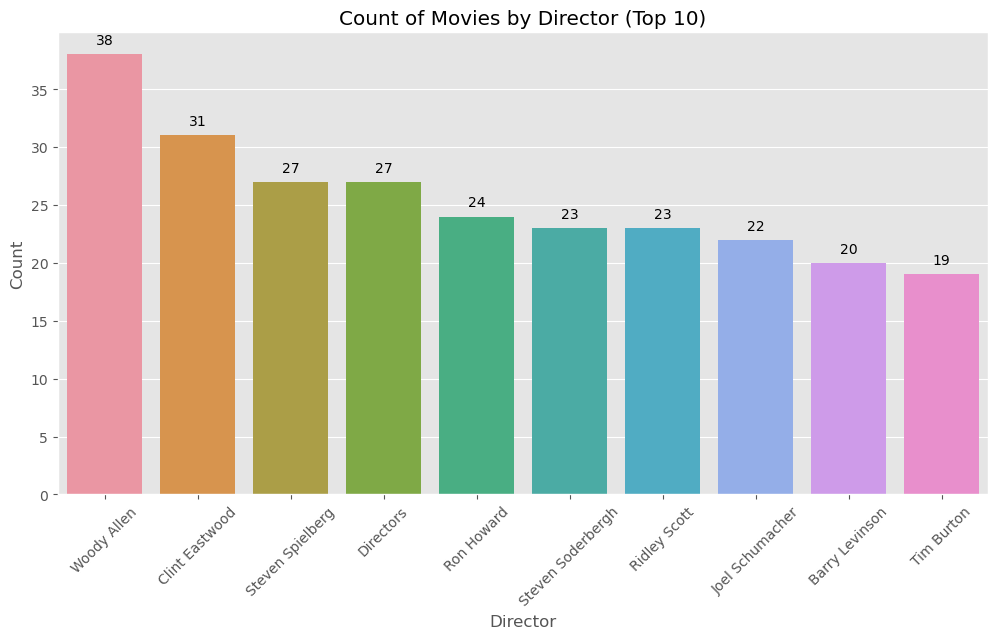

In [34]:
# Count of Movies by Director

plt.figure(figsize=(12, 6))
director_counts = df["director"].value_counts().head(10)
ax = sns.barplot(x=director_counts.index, y=director_counts.values)
plt.xlabel("Director")
plt.ylabel("Count")
plt.title("Count of Movies by Director (Top 10)")
plt.xticks(rotation=45)

# Adding annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Please Leave a Heart